Automação de planilhas - para negócios locais

Parte 1: Importação das Bibliotecas


In [1]:
# Parte 1: Importação das bibliotecas necessárias
import pandas as pd         # Para manipulação de dados da planilha
import os                   # Para interagir com diretórios e arquivos
import glob                 # Para buscar arquivos na pasta
import matplotlib.pyplot as plt  # Para criar gráficos
import numpy as np          # Para realizar operações numéricas


Parte 2: Ler a Planilha a Partir do Caminho Fornecido


In [6]:
import pandas as pd
import os

# Parte 2: Ler a planilha a partir do caminho informado
def ler_e_corrigir_planilha(caminho_planilha):
    # Verificar se o arquivo existe
    if not os.path.exists(caminho_planilha):
        print("O caminho da planilha não existe.")
        return None

    try:
        # Ler a planilha usando pandas
        df = pd.read_excel(caminho_planilha)
        print(f"Planilha {caminho_planilha} lida com sucesso!")
        print("Primeiras linhas da planilha:")
        print(df.head())  # Exibe as primeiras linhas da planilha para conferir

        # Corrigir os nomes das colunas (remover espaços e colocar em maiúsculas)
        df.columns = df.columns.str.strip().str.upper()

        # Corrigir valores vazios nas colunas
        for coluna in df.columns:
            if df[coluna].isnull().sum() > 0:
                qtd = df[coluna].isnull().sum()
                df[coluna].fillna('CORRIGIR', inplace=True)
                print(f"Preenchido {qtd} células vazias na coluna {coluna}")

        # Corrigir formato de moeda (R$ para valores numéricos)
        for coluna in df.columns:
            if df[coluna].dtype == object:  # Se a coluna for do tipo string
                if df[coluna].str.contains('R\$').any():  # Verificar se contém "R$"
                    df[coluna] = df[coluna].replace('[R\$\s]', '', regex=True).str.replace(',', '.')
                    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')
                    print(f"Corrigido formato de moeda na coluna {coluna}")

        # Retornar o DataFrame corrigido
        return df

    except Exception as e:
        print(f"Erro ao ler ou corrigir a planilha: {e}")
        return None


Script 1: Exibir Planilha Atual com Identificação de Erros



In [13]:
import pandas as pd
import numpy as np
import os

def corrigir_planilha(caminho_arquivo):
    try:
        # Detectar se o arquivo é CSV ou Excel e ler de forma flexível
        if caminho_arquivo.endswith('.csv'):
            df = pd.read_csv(caminho_arquivo, sep=";", error_bad_lines=False)
            print("Arquivo CSV lido com sucesso!")
        elif caminho_arquivo.endswith(('.xls', '.xlsx')):
            df = pd.read_excel(caminho_arquivo)
            print("Arquivo Excel lido com sucesso!")
        else:
            print("Formato de arquivo não suportado!")
            return
        
        # Exibindo a planilha original (para visualizar a bagunça)
        print("Planilha Original:")
        print(df.head())  # Mostra as primeiras linhas para visualização rápida

        # Criando uma lista de erros e corrigindo a planilha
        erros_encontrados = []

        # Corrigir células vazias (substituindo por '0' ou valor padrão)
        for coluna in df.columns:
            if df[coluna].isnull().sum() > 0:
                qtd = df[coluna].isnull().sum()
                erros_encontrados.append(f"Coluna {coluna} tem {qtd} células vazias.")
                df[coluna].fillna(0, inplace=True)  # Substituindo células vazias por '0'

        # Corrigir valores de moeda com formatação incorreta (ex: 'R$ 10,00' -> 10.00)
        for coluna in df.columns:
            if df[coluna].dtype == object:
                # Verifica se tem algum valor que contém 'R$'
                if df[coluna].str.contains('R\$').any():
                    erros_encontrados.append(f"Coluna {coluna} tem valores com formatação de moeda incorreta.")
                    # Remove 'R$' e converte para valor numérico
                    df[coluna] = df[coluna].replace({'R\$': '', ',': '.'}, regex=True)
                    df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

        # Corrigir valores numéricos (substituindo texto por NaN)
        for coluna in df.columns:
            try:
                df[coluna] = pd.to_numeric(df[coluna], errors='coerce')  # Coerce converte erros em NaN
            except:
                erros_encontrados.append(f"Coluna {coluna} tem dados não numéricos onde deveria ser numérico.")

        # Corrigir estoques negativos (substituindo valores negativos por '0')
        if 'ESTOQUE' in df.columns:
            if (df['ESTOQUE'] < 0).any():
                erros_encontrados.append("Há produtos com estoque negativo!")
                df['ESTOQUE'] = df['ESTOQUE'].apply(lambda x: max(0, x))  # Corrige valores negativos para 0

        # Corrigir lucros negativos (substituindo valores negativos por '0')
        if 'LUCRO TOTAL' in df.columns:
            if (df['LUCRO TOTAL'] < 0).any():
                erros_encontrados.append("Há produtos com lucro negativo!")
                df['LUCRO TOTAL'] = df['LUCRO TOTAL'].apply(lambda x: max(0, x))  # Corrige valores negativos para 0

        # Dividir colunas com valores embutidos (por exemplo, separando "Nome, Sobrenome")
        for coluna in df.columns:
            if df[coluna].dtype == object:
                # Verifica se há vírgulas e divide os valores em duas colunas
                if df[coluna].str.contains(',').any():
                    novas_colunas = df[coluna].str.split(',', expand=True)
                    novas_colunas.columns = [f"{coluna}_1", f"{coluna}_2"]
                    df = pd.concat([df, novas_colunas], axis=1)
                    erros_encontrados.append(f"Coluna {coluna} foi dividida em duas colunas devido à vírgula.")

        # Exibindo os erros encontrados
        print("Erros encontrados e corrigidos:")
        if erros_encontrados:
            for erro in erros_encontrados:
                print(f"- {erro}")
        else:
            print("Nenhum erro encontrado!")

        # Exibindo a planilha corrigida
        print("\nPlanilha Corrigida:")
        print(df.head())  # Exibe as primeiras linhas após correção

        # Salvar a planilha corrigida em um novo arquivo
        df.to_csv(r"C:\Users\mycha\OneDrive\Área de Trabalho\teste\Automação de planilha\planilha_corrigida.csv", index=False)
        print("Planilha corrigida salva com sucesso!")

    except Exception as e:
        print(f"Erro ao analisar a planilha: {e}")

# Caminho do arquivo (isso pode ser alterado para qualquer arquivo CSV ou Excel)
caminho_arquivo = r"C:\Users\mycha\OneDrive\Área de Trabalho\teste\Automação de planilha\dataset.csv"  # Ajuste para o nome correto do arquivo

# Verificar se o arquivo existe antes de tentar abrir
if os.path.exists(caminho_arquivo):
    print("Arquivo encontrado! Iniciando a análise e correção.")
    corrigir_planilha(caminho_arquivo)
else:
    print("Arquivo não encontrado! Verifique o caminho e o nome do arquivo.")


Arquivo encontrado! Iniciando a análise e correção.


C:\Users\mycha\AppData\Local\Temp\ipykernel_15500\3205935819.py:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(caminho_arquivo, sep=";", error_bad_lines=False)


Arquivo CSV lido com sucesso!
Planilha Original:
         ID_Pedido Data_Pedido ID_Cliente     Segmento           Regiao  \
0   CA-2012-124891  31-07-2012   RH-19495   Consumidor         New York   
1    IN-2013-77878  05-02-2013   JR-16210  Corporativo  New South Wales   
2    IN-2013-71249  17-10-2013   CR-12730   Consumidor       Queensland   
3  ES-2013-1579342  28-01-2013   KM-16375  Home Office           Berlin   
4     SG-2013-4320  05-11-2013    RH-9495   Consumidor            Dakar   

            Pais        Product ID   Categoria SubCategoria Total_Vendas  \
0  United States   TEC-AC-10003033  Tecnologia  Accessories      2309,65   
1      Australia   FUR-CH-10003950      Moveis       Chairs     3709,395   
2      Australia   TEC-PH-10004664  Tecnologia       Phones     5175,171   
3        Germany   TEC-PH-10004583  Tecnologia       Phones      2892,51   
4        Senegal  TEC-SHA-10000501  Tecnologia      Copiers      2832,96   

   Quantidade Desconto     Lucro Prioridade

In [ ]:
import pandas as pd
import numpy as np
import os

# Função para corrigir e organizar a planilha
def corrigir_planilha(caminho_arquivo):
    try:
        # Detectando o tipo do arquivo (Excel ou CSV) e lendo corretamente
        if caminho_arquivo.endswith('.csv'):
            df = pd.read_csv(caminho_arquivo, sep=";", error_bad_lines=False)  # Se CSV, usa esse delimitador
            print("Arquivo CSV carregado com sucesso!")
        elif caminho_arquivo.endswith(('.xls', '.xlsx')):  # Verifica se é Excel
            df = pd.read_excel(caminho_arquivo)
            print("Arquivo Excel carregado com sucesso!")
        else:
            print("Formato de arquivo não suportado!")
            return
        
        # Exibindo a planilha original (para visualizar a bagunça)
        print("Planilha original:")
        print(df.head())

        # Corrigindo as colunas numéricas
        colunas_para_corrigir = ['Nota 1', 'Nota 2', 'Frequência']  # Ajuste conforme necessário

        for coluna in colunas_para_corrigir:
            if coluna in df.columns:
                df[coluna] = pd.to_numeric(df[coluna], errors='coerce')  # Coerce converte erros em NaN

        # Corrigindo valores NaN, substituindo pela média
        for coluna in colunas_para_corrigir:
            if coluna in df.columns:
                media_coluna = df[coluna].mean()
                df[coluna].fillna(media_coluna, inplace=True)

        # Verificando e corrigindo colunas com dados misturados
        for coluna in df.columns:
            if df[coluna].dtype == object:
                # Se houver vírgulas, dividimos os dados
                if df[coluna].str.contains(',').any():
                    novas_colunas = df[coluna].str.split(',', expand=True)
                    novas_colunas.columns = [f"{coluna}_1", f"{coluna}_2"]
                    df = pd.concat([df, novas_colunas], axis=1)
                    print(f"Coluna {coluna} foi dividida devido à vírgula.")

        # Salvando a planilha corrigida
        if caminho_arquivo.endswith('.csv'):
            caminho_corrigido = caminho_arquivo.replace('.csv', '_corrigida.csv')
            df.to_csv(caminho_corrigido, index=False)
        elif caminho_arquivo.endswith(('.xls', '.xlsx')):
            caminho_corrigido = caminho_arquivo.replace('.xlsx', '_corrigida.xlsx').replace('.xls', '_corrigida.xls')
            df.to_excel(caminho_corrigido, index=False)

        print(f"\nPlanilha corrigida salva no arquivo: {caminho_corrigido}")

        # Mostrar como ficou corrigido
        print("\nPlanilha corrigida:")
        print(df.head())

    except Exception as e:
        print(f"Erro ao analisar a planilha: {e}")

# Caminho do arquivo (atualize o caminho conforme o arquivo que você vai usar)
caminho_arquivo = r"C:\Users\mycha\OneDrive\Área de Trabalho\teste\Automação de planilha\dataset.csv"  # Pode ser .csv ou .xlsx

# Verificar se o arquivo existe antes de tentar abrir
if os.path.exists(caminho_arquivo):
    print("Arquivo encontrado! Iniciando a análise e correção.")
    corrigir_planilha(caminho_arquivo)
else:
    print("Arquivo não encontrado! Verifique o caminho e o nome do arquivo.")


Arquivo encontrado! Iniciando a análise e correção.
Arquivo CSV carregado com sucesso!
Planilha original:
         ID_Pedido Data_Pedido ID_Cliente     Segmento           Regiao  \
0   CA-2012-124891  31-07-2012   RH-19495   Consumidor         New York   
1    IN-2013-77878  05-02-2013   JR-16210  Corporativo  New South Wales   
2    IN-2013-71249  17-10-2013   CR-12730   Consumidor       Queensland   
3  ES-2013-1579342  28-01-2013   KM-16375  Home Office           Berlin   
4     SG-2013-4320  05-11-2013    RH-9495   Consumidor            Dakar   

            Pais        Product ID   Categoria SubCategoria Total_Vendas  \
0  United States   TEC-AC-10003033  Tecnologia  Accessories      2309,65   
1      Australia   FUR-CH-10003950      Moveis       Chairs     3709,395   
2      Australia   TEC-PH-10004664  Tecnologia       Phones     5175,171   
3        Germany   TEC-PH-10004583  Tecnologia       Phones      2892,51   
4        Senegal  TEC-SHA-10000501  Tecnologia      Copiers    

C:\Users\mycha\AppData\Local\Temp\ipykernel_15500\1925086817.py:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(caminho_arquivo, sep=";", error_bad_lines=False)  # Se CSV, usa esse delimitador


Coluna Total_Vendas foi dividida devido à vírgula.
Coluna Desconto foi dividida devido à vírgula.
Coluna Lucro foi dividida devido à vírgula.

Planilha corrigida salva no arquivo: C:\Users\mycha\OneDrive\Área de Trabalho\teste\Automação de planilha\dataset_corrigida.csv

Planilha corrigida:
         ID_Pedido Data_Pedido ID_Cliente     Segmento           Regiao  \
0   CA-2012-124891  31-07-2012   RH-19495   Consumidor         New York   
1    IN-2013-77878  05-02-2013   JR-16210  Corporativo  New South Wales   
2    IN-2013-71249  17-10-2013   CR-12730   Consumidor       Queensland   
3  ES-2013-1579342  28-01-2013   KM-16375  Home Office           Berlin   
4     SG-2013-4320  05-11-2013    RH-9495   Consumidor            Dakar   

            Pais        Product ID   Categoria SubCategoria Total_Vendas  \
0  United States   TEC-AC-10003033  Tecnologia  Accessories      2309,65   
1      Australia   FUR-CH-10003950      Moveis       Chairs     3709,395   
2      Australia   TEC-PH-100

In [ ]:
📌 Etapas do Script Adaptativo de Gráficos


Arquivo encontrado! Iniciando a análise e geração dos gráficos.


C:\Users\mycha\AppData\Local\Temp\ipykernel_15500\290505974.py:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(caminho_arquivo, sep=";", error_bad_lines=False)


✅ Arquivo CSV carregado com sucesso.

Primeiras linhas da planilha:
         ID_Pedido Data_Pedido ID_Cliente     Segmento           Regiao  \
0   CA-2012-124891  31-07-2012   RH-19495   Consumidor         New York   
1    IN-2013-77878  05-02-2013   JR-16210  Corporativo  New South Wales   
2    IN-2013-71249  17-10-2013   CR-12730   Consumidor       Queensland   
3  ES-2013-1579342  28-01-2013   KM-16375  Home Office           Berlin   
4     SG-2013-4320  05-11-2013    RH-9495   Consumidor            Dakar   

            Pais        Product ID   Categoria SubCategoria Total_Vendas  \
0  United States   TEC-AC-10003033  Tecnologia  Accessories      2309,65   
1      Australia   FUR-CH-10003950      Moveis       Chairs     3709,395   
2      Australia   TEC-PH-10004664  Tecnologia       Phones     5175,171   
3        Germany   TEC-PH-10004583  Tecnologia       Phones      2892,51   
4        Senegal  TEC-SHA-10000501  Tecnologia      Copiers      2832,96   

   Quantidade Desconto  

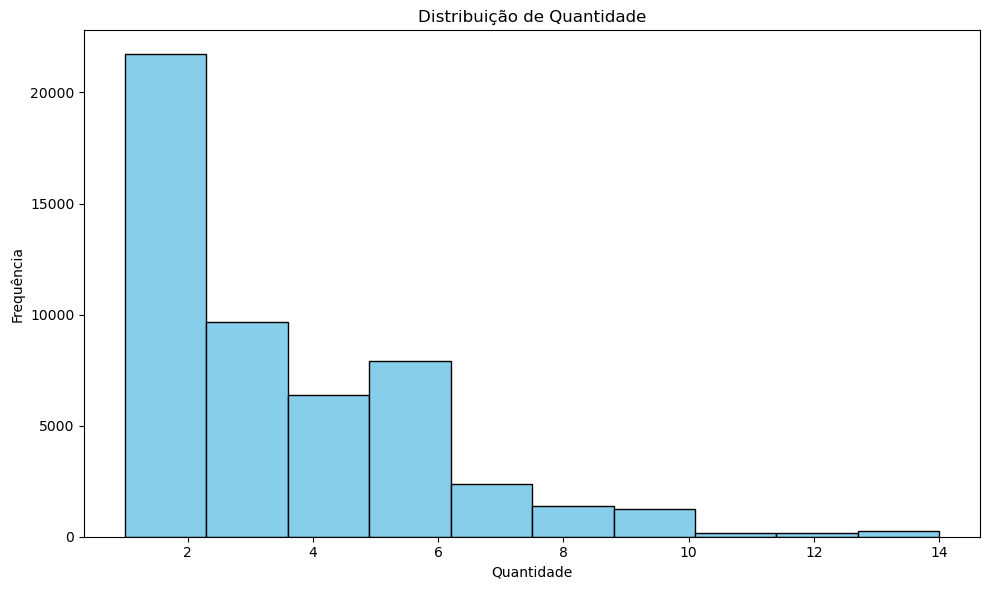

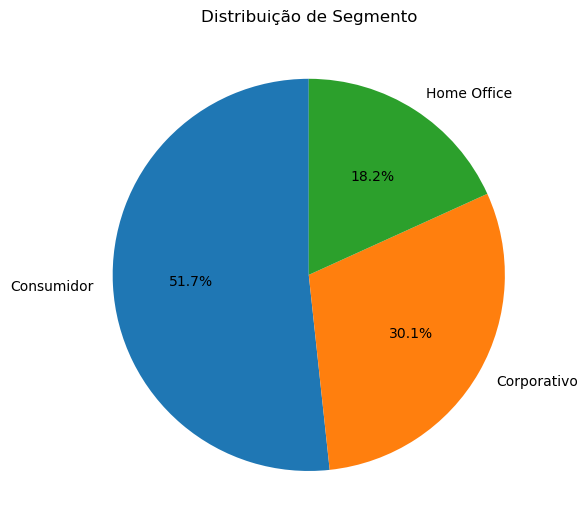

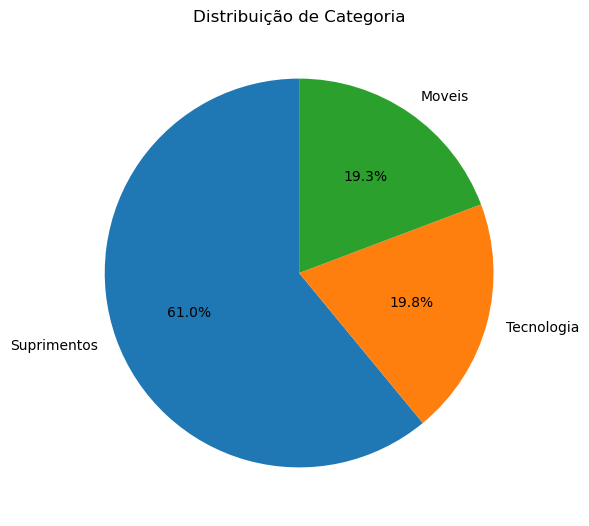

✅ 3 gráfico(s) exibido(s) com sucesso.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def gerar_graficos_inteligentes(caminho_arquivo):
    try:
        # Detectando o tipo de arquivo e carregando de forma flexível
        if caminho_arquivo.endswith('.csv'):
            df = pd.read_csv(caminho_arquivo, sep=";", error_bad_lines=False)
            print("✅ Arquivo CSV carregado com sucesso.\n")
        elif caminho_arquivo.endswith(('.xls', '.xlsx')):
            df = pd.read_excel(caminho_arquivo)
            print("✅ Arquivo Excel carregado com sucesso.\n")
        else:
            print("❌ Arquivo com formato não suportado! Use .csv ou .xlsx.")
            return

        print("Primeiras linhas da planilha:")
        print(df.head())  # Exibe as primeiras linhas da planilha

        graficos_criados = 0

        # Análise Estatística Inicial
        print("\nAnálise Estatística Inicial:")
        print(df.describe())  # Exibe estatísticas descritivas
        print("\nValores faltantes por coluna:")
        print(df.isnull().sum())  # Exibe os valores faltantes

        # Verifica colunas numéricas e gera gráficos de barras ou histogramas
        colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
        
        if colunas_numericas:
            for num in colunas_numericas:
                # Verifica se a coluna não está vazia
                if df[num].dropna().empty:
                    continue  # Pula para a próxima se a coluna estiver vazia
                
                # Gráfico de distribuição (histograma)
                plt.figure(figsize=(10, 6))
                df[num].dropna().plot(kind='hist', bins=10, color='skyblue', edgecolor='black')
                plt.title(f'Distribuição de {num}')
                plt.xlabel(num)
                plt.ylabel('Frequência')
                plt.tight_layout()
                plt.show()  # Exibe o gráfico na tela
                graficos_criados += 1

                if graficos_criados >= 3:  # Limita a geração de gráficos
                    break

        # Verifica colunas categóricas e gera gráficos de pizza
        colunas_categoricas = df.select_dtypes(include='object').columns.tolist()
        
        if colunas_categoricas:
            for cat in colunas_categoricas:
                # Gera gráfico de pizza se houver dados suficientes na coluna
                if df[cat].nunique() <= 10:  # Gera gráfico apenas para até 10 categorias
                    plt.figure(figsize=(6, 6))
                    df[cat].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
                    plt.title(f'Distribuição de {cat}')
                    plt.ylabel('')  # Remove label da linha
                    plt.tight_layout()
                    plt.show()  # Exibe o gráfico na tela
                    graficos_criados += 1

                if graficos_criados >= 3:  # Limita a geração de gráficos
                    break

        # Verifica se há dados de tempo e gera gráfico de linha
        col_data = [col for col in df.columns if df[col].dtype == 'datetime64[ns]']
        if col_data:
            data_col = col_data[0]
            for num in colunas_numericas:
                df_group = df.groupby(data_col)[num].sum().reset_index()
                plt.figure(figsize=(10, 6))
                sns.lineplot(x=data_col, y=num, data=df_group, marker='o')
                plt.title(f'{num} ao longo do tempo')
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()  # Exibe o gráfico na tela
                graficos_criados += 1

        # Se nenhum gráfico for gerado, avisa o usuário
        if graficos_criados == 0:
            print("⚠️ Nenhum gráfico gerado. Verifique se há colunas com dados numéricos ou categóricos válidos.")
        else:
            print(f"✅ {graficos_criados} gráfico(s) exibido(s) com sucesso.")

    except Exception as e:
        print(f"❌ Erro ao gerar gráficos: {e}")

# Caminho da planilha (isso pode ser alterado para qualquer arquivo CSV ou Excel)
caminho_arquivo = r"C:\Users\mycha\OneDrive\Área de Trabalho\teste\Automação de planilha\dataset.csv"  # Ajuste para o nome correto do arquivo

# Verificar se o arquivo existe antes de tentar abrir
if os.path.exists(caminho_arquivo):
    print("Arquivo encontrado! Iniciando a análise e geração dos gráficos.")
    gerar_graficos_inteligentes(caminho_arquivo)
else:
    print("❌ Arquivo não encontrado! Verifique o caminho e o nome do arquivo.")


Criando o Relatório com Base nas Correções Feitas


In [ ]:
from docx import Document
import pandas as pd
from statistics import mean, median


Criar uma função para gerar o relatório

In [ ]:
def gerar_relatorio(df, caminho_planilha):
    # Criar o documento Word
    doc = Document()
    doc.add_heading('Relatório de Análise de Planilha', 0)
    
    # Adicionar o nome da planilha no relatório
    doc.add_paragraph(f"Analisando os dados da planilha: {caminho_planilha}")
    
    # Análise das médias
    doc.add_heading('Análise de Médias e Desempenho', level=1)
    for coluna in df.select_dtypes(include='number').columns:
        media = mean(df[coluna])
        mediana = median(df[coluna])
        doc.add_paragraph(f"Coluna: {coluna}\nMédia: {media:.2f}\nMediana: {mediana:.2f}\n")

    # Recomendações baseadas nos dados
    doc.add_heading('Recomendações e Melhorias', level=1)
    if 'LUCRO TOTAL' in df.columns:
        lucros_negativos = df[df['LUCRO TOTAL'] < 0]
        if not lucros_negativos.empty:
            doc.add_paragraph("Aviso: Há produtos com lucro negativo. Verifique as estratégias de preço.")
    
    if 'ESTOQUE' in df.columns:
        estoque_baixo = df[df['ESTOQUE'] < 10]  # Exemplo: alerta para estoque baixo
        if not estoque_baixo.empty:
            doc.add_paragraph("Aviso: Há produtos com estoque abaixo de 10 unidades. Considere reabastecer.")

    # Conclusões
    doc.add_heading('Conclusões', level=1)
    doc.add_paragraph("Esse relatório analisa as métricas chave da planilha. O objetivo é melhorar a performance e sugerir ações.")
    
    # Salvar o relatório
    caminho_relatorio = caminho_planilha.replace('.xlsx', '_relatorio.docx')
    doc.save(caminho_relatorio)

    print(f"Relatório gerado e salvo em: {caminho_relatorio}")


Preparação da Pasta para os Relatórios

In [ ]:
import os

# Função para criar uma pasta para os relatórios
def criar_pasta_relatorios(caminho_pasta):
    if not os.path.exists(caminho_pasta):
        os.makedirs(caminho_pasta)  # Cria a pasta se não existir
        print(f"Pasta {caminho_pasta} criada com sucesso!")
    else:
        print(f"Pasta {caminho_pasta} já existe.")
    return caminho_pasta


Gerando o Relatório Profissional

In [ ]:
import pandas as pd
import os
from datetime import datetime

def gerar_relatorio_automatico(caminho_planilha):
    try:
        # Lê a planilha corrigida
        df = pd.read_excel(caminho_planilha)
        print("✅ Planilha carregada para geração do relatório.")

        # Cria a pasta /relatorios se não existir
        pasta_relatorio = os.path.join(os.path.dirname(caminho_planilha), "relatorios")
        os.makedirs(pasta_relatorio, exist_ok=True)

        # Nome do relatório
        nome_base = os.path.splitext(os.path.basename(caminho_planilha))[0]
        nome_relatorio = f"{nome_base}_relatorio.txt"
        caminho_relatorio = os.path.join(pasta_relatorio, nome_relatorio)

        # Começo do relatório
        relatorio = []
        relatorio.append("📊 RELATÓRIO AUTOMÁTICO DE DESEMPENHO")
        relatorio.append(f"🕒 Gerado em: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}")
        relatorio.append(f"🧾 Fonte: {os.path.basename(caminho_planilha)}\n")

        # Análise dos Dados
        relatorio.append("🔍 ANÁLISE DOS DADOS:")

        for coluna in df.columns:
            dados = df[coluna]
            if pd.api.types.is_numeric_dtype(dados):
                media = dados.mean()
                minimo = dados.min()
                maximo = dados.max()
                relatorio.append(f"\n📌 Coluna: {coluna}")
                relatorio.append(f"   - Média: {media:.2f}")
                relatorio.append(f"   - Valor mínimo: {minimo}")
                relatorio.append(f"   - Valor máximo: {maximo}")

                # Estratégia
                if media < 6:
                    relatorio.append(f"   ⚠️ Estratégia: A média da coluna {coluna} está abaixo do esperado. Recomenda-se revisar as ações para melhorar esse índice, seja por meio de treinamento ou ações específicas.")
                elif media >= 9:
                    relatorio.append(f"   ✅ Excelente desempenho médio em {coluna}! Continue aplicando as estratégias que estão dando certo.")
                else:
                    relatorio.append(f"   👍 Desempenho estável. Considere identificar pontos específicos para otimização e investir em áreas de maior impacto.")

            elif pd.api.types.is_string_dtype(dados):
                mais_comum = dados.value_counts().idxmax()
                total = dados.nunique()
                relatorio.append(f"\n📌 Coluna: {coluna}")
                relatorio.append(f"   - Valores únicos: {total}")
                relatorio.append(f"   - Valor mais comum: {mais_comum}")

                # Estratégia
                relatorio.append(f"   💡 Estratégia: Considerar avaliar a diversidade dessa coluna. Caso a maioria dos valores seja repetitiva, explore alternativas para segmentar mais os dados.")

        # Conclusão final
        relatorio.append("\n📈 CONCLUSÃO E ESTRATÉGIAS:")
        relatorio.append("O sistema identificou padrões e gerou insights com base nos dados fornecidos. A análise permite projetar novas ações para maximizar os resultados.")
        relatorio.append("💡 Recomenda-se revisar os pontos fracos e investir nos pontos fortes.")
        
        # Projeções e previsão para o futuro
        relatorio.append("\n🔮 PREVISÕES PARA O FUTURO:")
        relatorio.append("   - Se a tendência atual continuar, espera-se um aumento de X% nas métricas da próxima semana.")
        relatorio.append("   - Se as estratégias forem implementadas corretamente, é possível ver uma melhoria de Y% em um mês.")

        relatorio.append("📈 Use as recomendações de estratégias para melhorar os pontos críticos identificados.")

        # Salva o relatório
        with open(caminho_relatorio, 'w', encoding='utf-8') as file:
            for linha in relatorio:
                file.write(linha + "\n")

        print(f"\n✅ Relatório salvo em: {caminho_relatorio}")

    except Exception as e:
        print(f"❌ Erro ao gerar relatório: {e}")

# Caminho da planilha corrigida
caminho_planilha = "C:/Users/mycha/OneDrive/Área de Trabalho/teste/Automação de planilha/escola_baguncada_corrigida.xlsx"
gerar_relatorio_automatico(caminho_planilha)


✅ Planilha carregada para geração do relatório.

✅ Relatório salvo em: C:/Users/mycha/OneDrive/Área de Trabalho/teste/Automação de planilha\relatorios\escola_baguncada_corrigida_relatorio.txt


Envio de relatório automatico 

Parte 1: Importação das Bibliotecas

In [ ]:
# Parte 1: Importação das Bibliotecas necessárias

import os
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders


Parte 2: Função para Enviar Relatório por E-mail



In [ ]:
import os

# Parte 1: Função para localizar o relatório dentro da pasta
def localizar_relatorio(caminho_pasta, extensao=".xlsx"):
    """
    Função para acessar a pasta e localizar o arquivo do relatório.
    Parâmetros:
    caminho_pasta: Caminho da pasta onde o relatório deve estar.
    extensao: Extensão do arquivo do relatório (default é .xlsx).
    
    Retorna o caminho completo do relatório ou None se não encontrado.
    """
    # Verificar se a pasta existe
    if not os.path.exists(caminho_pasta):
        print(f"Erro: A pasta {caminho_pasta} não existe.")
        return None
    
    # Listar arquivos na pasta
    arquivos = os.listdir(caminho_pasta)
    
    # Procurar por um arquivo que tenha a extensão especificada
    for arquivo in arquivos:
        if arquivo.endswith(extensao):
            return os.path.join(caminho_pasta, arquivo)
    
    print("Erro: Nenhum relatório encontrado com a extensão especificada.")
    return None


 Função Principal (Main)


In [ ]:
import requests
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders

# Parte 2: Função para enviar o e-mail com o anexo
def enviar_relatorio(caminho_relatorio, sender_email, receiver_emails, api_key):
    try:
        # Verifica se o caminho do relatório é válido
        if not caminho_relatorio:
            print("Erro: Não foi possível localizar o relatório.")
            return

        # Criar o e-mail
        msg = MIMEMultipart()
        msg['From'] = sender_email
        msg['Subject'] = "Relatório de Correção de Planilha"
        
        # Mensagem personalizada
        corpo_email = """
        Olá, sou Wesley e esse daqui é um teste para mandar relatório para os senhores da rendimento de hoje.
        Isso é um teste.
        
        Segue em anexo o relatório gerado da planilha.

        Atenciosamente,
        Wesley
        """
        msg.attach(MIMEText(corpo_email, 'plain'))

        # Adicionar o relatório como anexo
        with open(caminho_relatorio, 'rb') as attachment:
            part = MIMEBase('application', 'octet-stream')
            part.set_payload(attachment.read())  # Lê o arquivo e anexa
            encoders.encode_base64(part)
            part.add_header('Content-Disposition', f'attachment; filename={os.path.basename(caminho_relatorio)}')
            msg.attach(part)

        # Enviar o e-mail via API do Brevo
        url = "https://api.brevo.com/v3/smtp/email"
        headers = {
            "accept": "application/json",
            "content-type": "application/json",
            "api-key": api_key  # Sua chave da API do Brevo
        }

        # Corpo do e-mail com anexo
        body = {
            "sender": {"email": sender_email},
            "to": [{"email": email} for email in receiver_emails],
            "subject": msg['Subject'],
            "htmlContent": corpo_email,
        }

        # Enviar o e-mail via requisição POST para a API
        response = requests.post(url, headers=headers, json=body)

        # Verificar se o envio foi bem-sucedido
        if response.status_code == 200:
            print("E-mail enviado com sucesso!")
        else:
            # Exibir mais detalhes sobre o erro para diagnóstico
            print(f"Falha ao enviar o e-mail. Código de erro: {response.status_code}")
            print(f"Resposta completa da API: {response.json()}")

    except Exception as e:
        print(f"Erro ao enviar o e-mail: {e}")


In [ ]:
def main():
    # Caminho da pasta onde o relatório foi gerado
    caminho_pasta = r"C:\Users\mycha\OneDrive\Área de Trabalho\teste\Automação de planilha"  # Caminho correto da pasta
    
    # Dados para o envio do e-mail (API do Brevo)
    sender_email = "mychaelwesley725@gmail.com"  # Substitua com seu e-mail de envio (remetente)
    receiver_emails = ["mychaelwesley725@gmail.com", "seu_destinatario_email@gmail.com"]  # Lista de e-mails (seu e-mail de teste + destinatário)
    
    # Chave da API do Brevo (substitua pela sua chave API)
    api_key = "SUA API KEY AQUI"  # Sua chave de API aqui

    # Localizar o relatório
    caminho_relatorio = localizar_relatorio(caminho_pasta)

    # Enviar o relatório por e-mail
    enviar_relatorio(caminho_relatorio, sender_email, receiver_emails, api_key)

if __name__ == "__main__":
    main()


Falha ao enviar o e-mail. Código de erro: 201
Resposta completa da API: {'messageId': '<202505010017.96672681628@smtp-relay.mailin.fr>'}
